### Small Image Classification Using Convolutional Neural Network (CNN)




![My Image](images/small_images.jpg)


In [27]:
#we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#Load the dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

In [30]:
y_train.shape

(50000, 1)

In [31]:
y_train[:5]

#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
#convert it 2d to 1d
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
y_test = y_test.reshape(-1,)

In [34]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [35]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

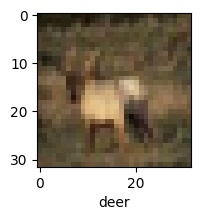

In [36]:
plot_sample(X_train, y_train, 3)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data


In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Build simple artificial neural network for image classification


ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

#You can see that at the end of 5 epochs, accuracy is at around 49%



c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3029 - loss: 1.9295
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4225 - loss: 1.6366
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4560 - loss: 1.5495
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4796 - loss: 1.4861
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4974 - loss: 1.4318


In [14]:
#Now let us build a convolutional neural network to train our images

#cnn 1
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
#cnn 2
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
#dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.3644 - loss: 1.7408
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5945 - loss: 1.1540
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6552 - loss: 0.9859
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.6862 - loss: 0.8950
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7170 - loss: 0.8156
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7349 - loss: 0.7673
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7555 - loss: 0.7080
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7667 - loss: 0.6732
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7848 - loss: 0.6181
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7945 - loss: 0.5901


### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7000 - loss: 0.9461


[0.9649285078048706, 0.6956999897956848]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[4.4785137e-04, 4.6021748e-07, 1.5998211e-04, 9.1154718e-01,
        1.3959151e-05, 3.1646498e-02, 1.6203604e-03, 1.2021793e-05,
        5.4430526e-02, 1.2112726e-04],
       [9.6663646e-03, 2.3416309e-01, 5.3280887e-06, 2.6491459e-06,
        5.0932353e-08, 1.8306309e-08, 4.4625811e-10, 1.8487539e-09,
        7.4730515e-01, 8.8572837e-03],
       [1.3310117e-01, 5.5966425e-01, 8.7050762e-04, 7.7919435e-04,
        1.7501537e-03, 1.4839902e-04, 6.7019164e-06, 3.5500301e-03,
        1.8587629e-01, 1.1425329e-01],
       [9.8297334e-01, 2.7696067e-03, 1.8386211e-03, 3.3068280e-03,
        1.2548458e-03, 8.8186294e-05, 1.4406611e-04, 4.4573395e-04,
        4.5827823e-03, 2.5959420e-03],
       [1.5324271e-06, 1.4611246e-04, 1.9489972e-02, 1.5524818e-02,
        7.1676396e-02, 1.8542660e-03, 8.9128202e-01, 1.0276566e-05,
        7.9398942e-06, 6.7197561e-06]], dtype=float32)

In [19]:
# now use argmax for find the max value

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

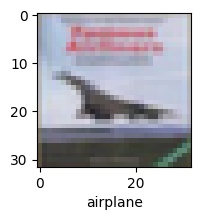

In [24]:
#tested value
plot_sample(X_test, y_test,3)

In [25]:
#predicted

classes[y_classes[3]]

'airplane'